# AWS SaaS Sales Analysis

## Latar Belakang
Perusahaan yang bergerak dalam model Software as a Service (SaaS) berbasis Business-to-Business (B2B) menghadapi tantangan besar dalam menjaga pertumbuhan penjualan sekaligus memastikan profitabilitas jangka panjang. Dengan beragamnya segmen pelanggan (SMB, Enterprise, Strategic), variasi produk, serta strategi diskon yang digunakan, perusahaan perlu melakukan evaluasi menyeluruh untuk mengetahui faktor-faktor utama yang memengaruhi performa penjualan dan keuntungan.

## Pernyataan Masalah
Perusahaan SaaS ini ingin mengevaluasi efektivitas strategi penjualannya, terutama terkait pemberian diskon dan kontribusi profit dari berbagai segmen pelanggan, produk, dan wilayah. Saat ini, strategi diskon digunakan untuk mendorong penjualan, namun belum diketahui apakah diskon tersebut benar-benar menguntungkan perusahaan. Selain itu, belum ada pemetaan jelas mengenai karakteristik pelanggan dan produk yang memberikan profit tertinggi.

Seberapa efektif strategi diskon dalam meningkatkan profit, dan bagaimana karakteristik segmen pelanggan, produk, serta wilayah yang paling berkontribusi terhadap profitabilitas perusahaan?

## Data

Untuk menjawab pertanyaan di atas, kita akan menganalisa data peserta yang sudah dikumpulkan oleh perusahaan. Dataset dapat diakses [di sini](https://www.kaggle.com/datasets/nnthanh101/aws-saas-sales).

Dataset AWS SaaS Sales berisi data transaksi dari sebuah perusahaan SaaS fiktif, mencakup detail pelanggan, produk, diskon, jumlah penjualan, dan profit. Melalui analisis data ini, perusahaan dapat memperoleh wawasan penting untuk menyusun strategi pemasaran, promosi, dan segmentasi yang lebih tepat sasaran.

Terdapat 19 kolom di dalam dataset AWS SaaS Sales, yaitu:
- Row ID: A unique identifier for each transaction.
- Order ID: A unique identifier for each order.
- Order Date: The date when the order was placed.
- Date Key: A numerical representation of the order date (YYYYMMDD).
- Contact Name: The name of the person who placed the order.
- Country: The country where the order was placed.
- City: The city where the order was placed.
- Region: The region where the order was placed.
- Subregion: The subregion where the order was placed.
- Customer: The name of the company that placed the order.
- Customer ID: A unique identifier for each customer.
- Industry: The industry the customer belongs to.
- Segment: The customer segment (SMB, Strategic, Enterprise, etc.).
- Product: The product was ordered.
- License: The license key for the product.
- Sales: The total sales amount for the transaction.
- Quantity: The total number of items in the transaction.
- Discount: The discount applied to the transaction.
- Profit: The profit from the transaction.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings("ignore")

## Data Understanding

1. Berikut adalah 5 baris teratas dan terbawah dari dataset AWS SaaS Sales

In [3]:
df=pd.read_csv('SaaS-Sales.csv')
display(df.head(),df.tail())

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
9989,9990,EMEA-2020-110422,1/22/2020,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.248,3,0.2,4.1028
9990,9991,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.960,2,0.0,15.6332
9991,9992,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.576,2,0.2,19.3932
9992,9993,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.600,4,0.0,13.3200
9993,9994,AMER-2023-119914,5/5/2023,20230505,Jasmine Springer,United States,Dallas,AMER,NAMER,Comcast,1022,Communications,SMB,OneView,3NTBV9B3PS,243.160,2,0.0,72.9480


2. Melakukan pengecekan struktur dataset dan tipe data

In [4]:
print(f'Jumlah baris dan kolom adalah: {df.shape}')
df.info()

Jumlah baris dan kolom adalah: (9994, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null  

3. Melakukan pengecekan statistik deskriptif kolom numerik 

In [5]:
display(df.describe(), df.describe(include='object'))

,Row ID,Date Key,Customer ID,Sales,Quantity,Discount,Profit
count,9994.000000,9.994000e+03,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2.021803e+07,1049.771963,229.858001,3.789574,0.156203,28.656896
std,2885.163629,1.123898e+04,29.719388,623.245101,2.225110,0.206452,234.260108
min,1.000000,2.020010e+07,1001.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2.021052e+07,1024.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2.022063e+07,1049.000000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2.023052e+07,1076.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2.023123e+07,1101.000000,22638.480000,14.000000,0.800000,8399.976000


,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Industry,Segment,Product,License
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,1237,793,48,262,3,12,99,10,3,14,9994
top,EMEA-2023-100111,9/6/2022,Leonard Kelly,United States,London,EMEA,NAMER,Allianz,Finance,SMB,ContactMatcher,16GRM07R1K
freq,14,38,37,2001,922,4219,2507,192,2127,5191,1842,1


4. Melakukan pengecekan unique data pada setiap kolom

In [6]:
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,Row ID,9994,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
1,Order ID,5009,"[EMEA-2022-152156, AMER-2022-138688, EMEA-2021..."
2,Order Date,1237,"[11/9/2022, 6/13/2022, 10/11/2021, 6/9/2020, 4..."
3,Date Key,1237,"[20221109, 20220613, 20211011, 20200609, 20230..."
4,Contact Name,793,"[Nathan Bell, Deirdre Bailey, Zoe Hodges, Thom..."
5,Country,48,"[Ireland, United States, Germany, Sweden, Cana..."
6,City,262,"[Dublin, New York City, Stuttgart, Stockholm, ..."
7,Region,3,"[EMEA, AMER, APJ]"
8,Subregion,12,"[UKIR, NAMER, EU-WEST, NOR, JAPN, EU, MEA, LAT..."
9,Customer,99,"[Chevron, Phillips 66, Royal Dutch Shell, BNP ..."


5. Melakukan pengecekan apakah terdapat missing value

In [7]:
df.isnull().sum()

Row ID          0
Order ID        0
Order Date      0
Date Key        0
Contact Name    0
Country         0
City            0
Region          0
Subregion       0
Customer        0
Customer ID     0
Industry        0
Segment         0
Product         0
License         0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

Data Understanding Summary
- Dataset SaaS-Sales.csv terdiri dari 19 kolom dan 9.994 baris data
- Tidak terdapat missing values pada dataset ini. Semua kolom terisi penuh, sehingga tidak diperlukan penanganan nilai kosong
- Kolom Row ID merupakan ID unik untuk setiap baris, yang tidak memiliki pengaruh terhadap analisis, sehingga bisa dihapus
- Kolom Order Date memiliki tipe data object padahal seharusnya bertipe datetime. Tipe ini perlu dikonversi agar bisa digunakan dalam analisis waktu (seperti tren bulanan atau tahunan)
- Kolom numerik seperti Sales, Profit, Quantity, dan Discount memiliki nilai ekstrem (outlier), terutama Sales yang mencapai hingga lebih dari 22.000, dan Profit yang bisa bernilai negatif hingga -6.599. Nilai-nilai ini masih masuk akal jika melihat transaksi bisnis berskala besar, namun tetap perlu ditinjau lebih lanjut pada tahap analisis outlier
- Kolom License berisi nilai unik acak seperti kode lisensi, sehingga tidak memiliki nilai analisis dan dapat diabaikan
- Terdapat kolom kategorikal seperti Segment, Product, Region, Industry, dan Subregion. Beberapa di antaranya berisi jumlah kategori yang cukup sedikit (misalnya Segment hanya berisi 3 jenis), sehingga cocok untuk visualisasi dan perbandingan antar grup
- Sebagian kolom kategorikal bisa dipertimbangkan untuk diubah menjadi tipe category guna menghemat memori dan mempercepat pemrosesan data
- Nilai pada kolom Discount disimpan dalam bentuk proporsi (misal: 0.2 berarti diskon 20%), dan memiliki rentang dari 0 hingga 0.8 (diskon 80%). Ini relevan dengan problem statement tentang efektivitas strategi diskon

=========================================================================================================================================================================================

## Data Cleaning

#### 1. Mengubah Data Type
Melakukan konversi pada kolom 'Order Date' yang memiliki tipe data 'object' menjadi 'datetime'

In [8]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Row ID        9994 non-null   int64         
 1   Order ID      9994 non-null   object        
 2   Order Date    9994 non-null   datetime64[ns]
 3   Date Key      9994 non-null   int64         
 4   Contact Name  9994 non-null   object        
 5   Country       9994 non-null   object        
 6   City          9994 non-null   object        
 7   Region        9994 non-null   object        
 8   Subregion     9994 non-null   object        
 9   Customer      9994 non-null   object        
 10  Customer ID   9994 non-null   int64         
 11  Industry      9994 non-null   object        
 12  Segment       9994 non-null   object        
 13  Product       9994 non-null   object        
 14  License       9994 non-null   object        
 15  Sales         9994 non-null   float64 

#### 2. Drop Column
Menghapus kolom yang tidak relevan

In [9]:
df = df.drop(['Row ID', 'License', 'Contact Name'], axis=1)

Kolom Row ID, License, dan Contact Name layak dihapus karena tidak relevan untuk analisis. Row ID hanya berfungsi sebagai penomoran baris, License merupakan kode unik acak yang tidak memberikan insight, dan Contact Name tidak dibutuhkan dalam konteks B2B yang lebih fokus pada pelanggan perusahaan, bukan individu.

#### 3. Check Duplicate
Mengecek apakah terdapat duplikasi data


In [10]:
df[df.duplicated(keep=False)]

,Order ID,Order Date,Date Key,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,Sales,Quantity,Discount,Profit
3405,AMER-2020-150119,2020-04-23,20200423,Mexico,Mexico City,AMER,LATAM,Itochu,1032,Finance,Enterprise,FinanceHub,281.372,2,0.3,-12.0588
3406,AMER-2020-150119,2020-04-23,20200423,Mexico,Mexico City,AMER,LATAM,Itochu,1032,Finance,Enterprise,FinanceHub,281.372,2,0.3,-12.0588


Dalam dataset ditemukan 1 baris data yang terduplikat secara identik, artinya seluruh nilai di baris tersebut sama persis dengan baris lain. Duplikat ini dapat menyebabkan hasil analisis menjadi bias, seperti menggandakan nilai penjualan atau profit. Oleh karena itu, baris tersebut perlu dihapus agar data menjadi bersih dan hasil analisis lebih akurat.

In [11]:
df = df.drop_duplicates()

#### 4. Normalisasi Format Data Categorical
Memastikan kolom kategorikal memiliki penulisan yang seragam untuk mencegah kesalahan pengelompokan saat agregasi

In [12]:
# Memasukan kolom-kolom yang akan diubah menjadi tipe data 'category'
categorical_cols = [
    'Segment', 'Region', 'Subregion',
    'Industry', 'Product', 'Customer',
    'Country', 'City'
]
# Menyederhanakan penulisan
for col in categorical_cols:
    df[col] = df[col].str.strip().str.title()
# Mengubah tipe data menjadi 'category'
for col in categorical_cols:
    df[col] = df[col].astype('category')

Kolom kategorikal sebaiknya diseragamkan ke huruf kecil untuk mencegah duplikasi kategori dan mempermudah analisis.

#### 5. Meminjau dan menandai Outlier pada kolom numeric
Untuk mengetahui nilai ekstrem pada kolom numeric

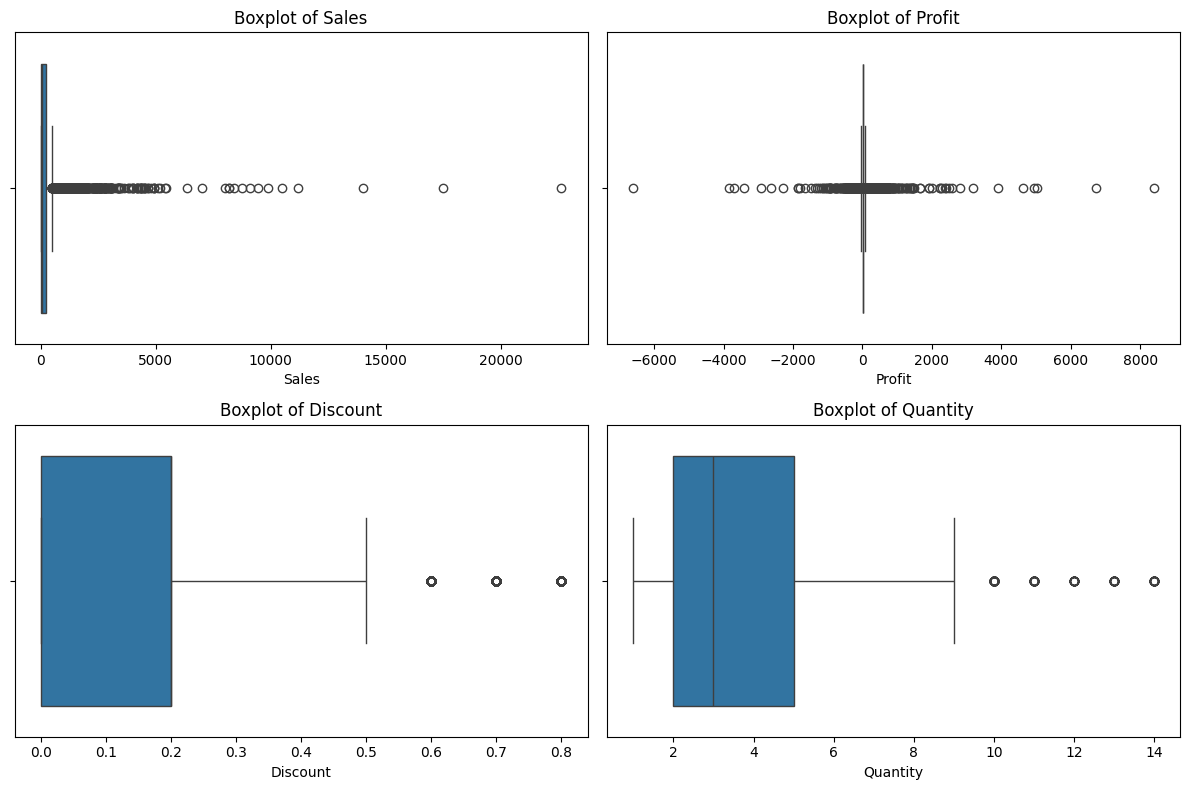

In [13]:
# Daftar kolom numerik yang ingin ditinjau
num_cols = ['Sales', 'Profit', 'Discount', 'Quantity']

# Plot boxplot untuk setiap kolom
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    sb.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()

Banyak nilai ekstrem ditemukan pada kolom Sales, Profit, Discount, dan Quantity. Nilai-nilai ini menunjukkan adanya transaksi besar, diskon tinggi, atau profit ekstrem yang perlu ditelusuri lebih lanjut

Sales

In [14]:
# Hitung Q1, Q3, dan IQR
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3 - Q1

# Hitung batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Median Sales
median_sales = df['Sales'].median()

# Filter outlier
outliers_sales = df[(df['Sales'] < lower_bound) | (df['Sales'] > upper_bound)]

# Tambahkan kolom selisih dari median untuk argumentasi
outliers_sales = outliers_sales.copy()  # Hindari warning
outliers_sales['Selisih dari Median'] = outliers_sales['Sales'] - median_sales
outliers_sales['Rasio terhadap Median'] = outliers_sales['Sales'] / median_sales

# Output
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)
print("Median Sales:", median_sales)
print("Jumlah Outlier:", outliers_sales.shape[0])
print("Outliers dengan Argumentasi Median:")
print(outliers_sales[['Profit', 'Selisih dari Median', 'Rasio terhadap Median']].head())

Lower Bound: -271.71000000000004
Upper Bound: 498.93
Median Sales: 54.48
Jumlah Outlier: 1167
Outliers dengan Argumentasi Median:
      Profit  Selisih dari Median  Rasio terhadap Median
1   219.5820             677.4600              13.435022
3  -383.0310             903.0975              17.576680
7    90.7152             852.6720              16.651101
10   85.3092            1651.7040              31.317621
11   68.3568             856.9440              16.729515


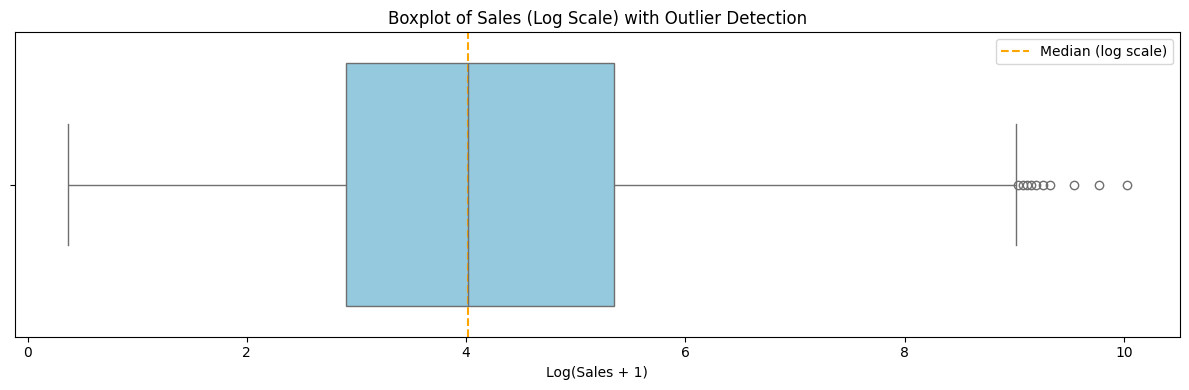

In [15]:
# Transformasi log(1 + Sales) hanya untuk keperluan visualisasi, tanpa menambah kolom ke df
sales_log = np.log1p(df['Sales'])

# Visualisasi boxplot log scale
plt.figure(figsize=(12, 4))
sb.boxplot(x=sales_log, color='skyblue')

# Garis median (log scale)
plt.axvline(np.log1p(df['Sales'].median()), color='orange', linestyle='--', label='Median (log scale)')

# Label dan tampilan
plt.title('Boxplot of Sales (Log Scale) with Outlier Detection')
plt.xlabel('Log(Sales + 1)')
plt.legend()
plt.tight_layout()
plt.show()

Berdasarkan analisis IQR, ditemukan 1.167 outlier pada kolom Sales yang berada di luar rentang -271,71 hingga 498,93. Mayoritas outlier ini merupakan transaksi dengan nilai penjualan sangat tinggi, bahkan beberapa mencapai lebih dari 30 kali lipat dari nilai median sebesar 54,48. Hal ini menunjukkan adanya transaksi bernilai besar yang berpotensi memengaruhi analisis rata-rata dan agregasi data, sehingga perlu ditangani secara khusus dalam proses analitik selanjutnya.

Profit

In [16]:
# Hitung Q1, Q3, dan IQR
Q1 = df['Profit'].quantile(0.25)
Q3 = df['Profit'].quantile(0.75)
IQR = Q3 - Q1

# Hitung batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Median Profit
median_profit = df['Profit'].median()

# Filter outlier
outliers_profit = df[(df['Profit'] < lower_bound) | (df['Profit'] > upper_bound)]

# Tambahkan kolom selisih dari median untuk argumentasi
outliers_profit = outliers_profit.copy()  # Hindari warning
outliers_profit['Selisih dari Median'] = outliers_profit['Profit'] - median_profit
outliers_profit['Rasio terhadap Median'] = outliers_profit['Profit'] / median_profit

# Output
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)
print("Median Profit:", median_profit)
print("Jumlah Outlier:", outliers_profit.shape[0])
print("Outliers dengan Argumentasi Median:")
print(outliers_profit[['Profit', 'Selisih dari Median', 'Rasio terhadap Median']].head())

Lower Bound: -39.7185
Upper Bound: 70.8135
Median Profit: 8.671
Jumlah Outlier: 1881
Outliers dengan Argumentasi Median:
      Profit  Selisih dari Median  Rasio terhadap Median
1   219.5820             210.9110              25.323723
3  -383.0310            -391.7020             -44.173798
7    90.7152              82.0442              10.461908
10   85.3092              76.6382               9.838450
13  132.5922             123.9212              15.291454


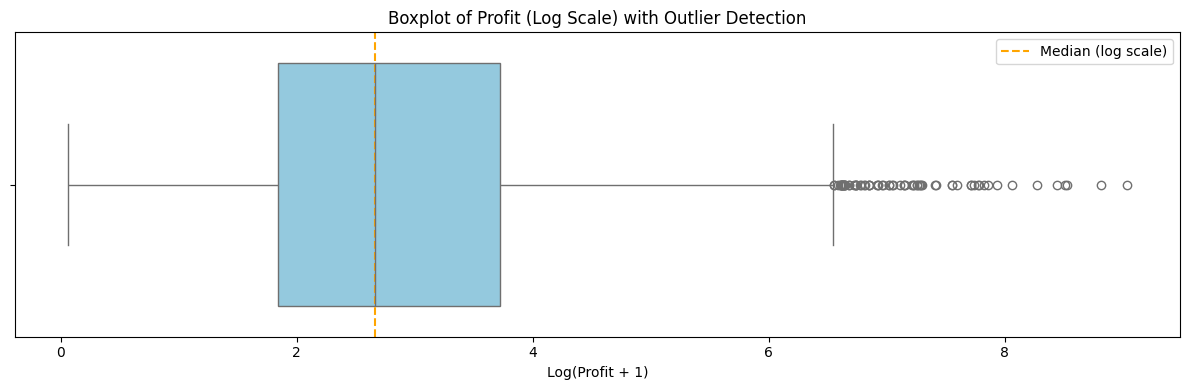

In [17]:
# Filter hanya Profit positif (log masuk akal)
profit_pos = df[df['Profit'] > 0]['Profit']
log_profit = np.log1p(profit_pos)

plt.figure(figsize=(12, 4))
sb.boxplot(x=log_profit, color='skyblue')

# Garis median dari data yang sama (log dari median profit positif)
plt.axvline(np.log1p(profit_pos.median()), color='orange', linestyle='--', label='Median (log scale)')

plt.title('Boxplot of Profit (Log Scale) with Outlier Detection')
plt.xlabel('Log(Profit + 1)')
plt.legend()
plt.tight_layout()
plt.show()

Berdasarkan analisis IQR, ditemukan 1.881 outlier pada kolom Profit yang berada di luar rentang -39,72 hingga 70,81. Mayoritas outlier ini merupakan transaksi dengan nilai keuntungan yang sangat ekstrem, baik sangat tinggi maupun sangat rendah. Beberapa outlier bahkan menunjukkan deviasi yang signifikan dari nilai median sebesar 8,67, seperti profit sebesar 219,58 yang lebih dari 25 kali lipat dari median, dan kerugian sebesar -383,03 yang hampir 44 kali lebih rendah dari nilai tengah. Kondisi ini menunjukkan bahwa nilai outlier dapat sangat memengaruhi analisis agregasi seperti rata-rata dan margin, sehingga perlu mendapat perhatian khusus dalam proses analitik dan pengambilan keputusan bisnis.

Discount

In [18]:
# Hitung Q1, Q3, dan IQR untuk kolom Discount
Q1 = df['Discount'].quantile(0.25)
Q3 = df['Discount'].quantile(0.75)
IQR = Q3 - Q1

# Hitung batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Median Discount
median_discount = df['Discount'].median()

# Filter outlier
outliers_discount = df[(df['Discount'] < lower_bound) | (df['Discount'] > upper_bound)]

# Salin untuk menghindari warning saat manipulasi
outliers_discount = outliers_discount.copy()

# Tambahkan kolom argumentasi (sementara, bisa dihapus nanti)
outliers_discount['Selisih dari Median'] = outliers_discount['Discount'] - median_discount
outliers_discount['Rasio terhadap Median'] = outliers_discount['Discount'] / median_discount

# Output
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)
print("Median Discount:", median_discount)
print("Jumlah Outlier:", outliers_discount.shape[0])
print("Outliers dengan Argumentasi Median:")
print(outliers_discount[['Discount', 'Selisih dari Median', 'Rasio terhadap Median']].head())


Lower Bound: -0.30000000000000004
Upper Bound: 0.5
Median Discount: 0.2
Jumlah Outlier: 856
Outliers dengan Argumentasi Median:
    Discount  Selisih dari Median  Rasio terhadap Median
14       0.8                  0.6                    4.0
15       0.8                  0.6                    4.0
28       0.7                  0.5                    3.5
32       0.7                  0.5                    3.5
36       0.6                  0.4                    3.0


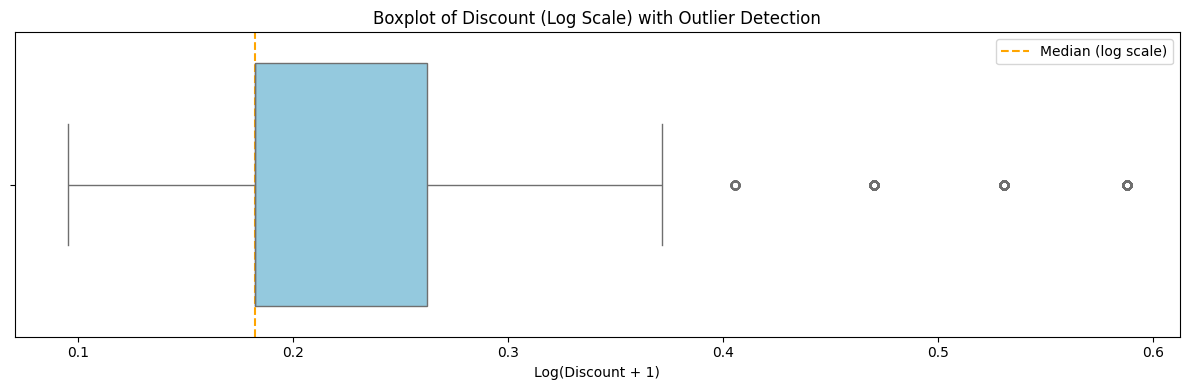

In [19]:
# Filter hanya Discount positif (log masuk akal)
discount_pos = df[df['Discount'] > 0]['Discount']
log_discount = np.log1p(discount_pos)

plt.figure(figsize=(12, 4))
sb.boxplot(x=log_discount, color='skyblue')

# Garis median dari data yang sama (log dari median discount positif)
plt.axvline(np.log1p(discount_pos.median()), color='orange', linestyle='--', label='Median (log scale)')

plt.title('Boxplot of Discount (Log Scale) with Outlier Detection')
plt.xlabel('Log(Discount + 1)')
plt.legend()
plt.tight_layout()
plt.show()

Berdasarkan analisis IQR, ditemukan 856 outlier pada kolom Discount yang berada di luar rentang -0,30 hingga 0,50. Meskipun batas bawah negatif secara teoritis tidak masuk akal untuk diskon, nilai-nilai di atas batas atas menunjukkan adanya transaksi dengan diskon yang sangat tinggi. Beberapa outlier tercatat memiliki diskon hingga 0,8 atau 4 kali lipat lebih besar dari nilai median diskon sebesar 0,2. Kondisi ini menunjukkan bahwa sebagian transaksi memiliki potongan harga yang tidak umum, yang dapat berdampak signifikan terhadap profitabilitas dan perlu dievaluasi lebih lanjut, terutama saat melakukan analisis margin atau efektivitas strategi promosi.

Quantity

In [20]:
# Hitung Q1, Q3, dan IQR untuk kolom Quantity
Q1 = df['Quantity'].quantile(0.25)
Q3 = df['Quantity'].quantile(0.75)
IQR = Q3 - Q1

# Hitung batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Median Quantity
median_quantity = df['Quantity'].median()

# Filter outlier
outliers_quantity = df[(df['Quantity'] < lower_bound) | (df['Quantity'] > upper_bound)]

# Salin untuk menghindari warning saat manipulasi
outliers_quantity = outliers_quantity.copy()

# Tambahkan kolom argumentasi (sementara, bisa dihapus nanti)
outliers_quantity['Selisih dari Median'] = outliers_quantity['Quantity'] - median_quantity
outliers_quantity['Rasio terhadap Median'] = outliers_quantity['Quantity'] / median_quantity

# Output
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)
print("Median Quantity:", median_quantity)
print("Jumlah Outlier:", outliers_quantity.shape[0])
print("Outliers dengan Argumentasi Median:")
print(outliers_quantity[['Quantity', 'Selisih dari Median', 'Rasio terhadap Median']].head())


Lower Bound: -2.5
Upper Bound: 9.5
Median Quantity: 3.0
Jumlah Outlier: 170
Outliers dengan Argumentasi Median:
     Quantity  Selisih dari Median  Rasio terhadap Median
113        14                 11.0               4.666667
139        14                 11.0               4.666667
147        11                  8.0               3.666667
251        13                 10.0               4.333333
329        10                  7.0               3.333333


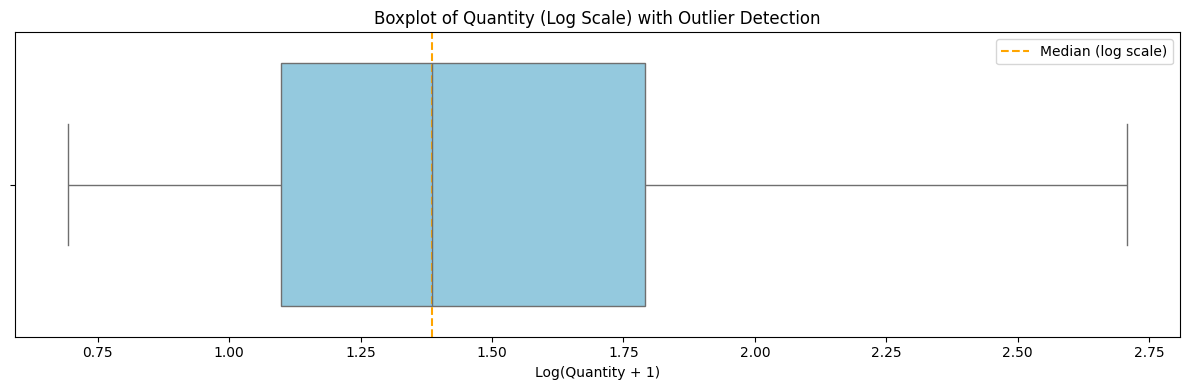

In [21]:
# Filter hanya Quantity positif (log masuk akal)
qty_pos = df[df['Quantity'] > 0]['Quantity']
log_qty = np.log1p(qty_pos)

plt.figure(figsize=(12, 4))
sb.boxplot(x=log_qty, color='skyblue')

# Garis median dari data yang sama (log dari median quantity positif)
plt.axvline(np.log1p(qty_pos.median()), color='orange', linestyle='--', label='Median (log scale)')

plt.title('Boxplot of Quantity (Log Scale) with Outlier Detection')
plt.xlabel('Log(Quantity + 1)')
plt.legend()
plt.tight_layout()
plt.show()

Berdasarkan analisis IQR, ditemukan 170 outlier pada kolom Quantity yang berada di luar rentang -2,5 hingga 9,5. Meskipun batas bawah bernilai negatif dan tidak relevan secara kontekstual (karena kuantitas tidak bisa kurang dari nol), batas atas menunjukkan bahwa terdapat sejumlah transaksi dengan jumlah barang yang jauh lebih besar dari umumnya. Beberapa outlier bahkan mencatatkan kuantitas hingga 14 unit, atau lebih dari 4 kali lipat nilai median sebesar 3 unit. Keberadaan outlier ini menunjukkan adanya transaksi skala besar yang dapat memengaruhi analisis agregat seperti rata-rata penjualan dan perlu ditangani secara hati-hati dalam proses analisis lanjutan.

**Conclusion:** 

Berdasarkan problem statement yang telah ditentukan, outlier yang ditemukan pada kolom Sales, Profit, Discount, dan Quantity tidak perlu dihapus. Seluruh outlier tersebut justru relevan dengan tujuan analisis, seperti mengevaluasi dampak diskon besar terhadap profit, mengidentifikasi pelanggan atau produk bernilai tinggi, serta memahami pola pembelian. Oleh karena itu, outlier akan tetap dipertahankan sebagai bagian penting dalam analisis lanjutan.

#### 6. Feature Engineering

- Order Year & Order Month

Tujuan: Menyimpan tahun dan bulan pemesanan untuk analisis tren waktu

In [22]:
# Menamambah kolom tahun dan bulan
df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month

- Profit Margin

Tujuan: Mengukur efisiensi keuntungan per penjualan

In [23]:
# Hitung rasio profit terhadap sales
df['Profit Margin'] = df['Profit'] / df['Sales']

- Discount Category

Tujuan: Mengelompokkan diskon ke dalam No, Low, Medium, dan High untuk analisis segmentasi

In [24]:
# Fungsi kategorisasi diskon
def categorize_discount(d):
    if d == 0:
        return 'No Discount'
    elif d <= 0.2:
        return 'Low'
    elif d <= 0.5:
        return 'Medium'
    else:
        return 'High'

# Terapkan ke kolom baru
df['Discount Category'] = df['Discount'].apply(categorize_discount)

# Mengubah tipe data menjadi 'category'
df['Discount Category'] = df['Discount Category'].astype('category')

In [25]:
df.head()

,Order ID,Order Date,Date Key,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,Sales,Quantity,Discount,Profit,Order Year,Order Month,Profit Margin,Discount Category
0,EMEA-2022-152156,2022-11-09,20221109,Ireland,Dublin,Emea,Ukir,Chevron,1017,Energy,Smb,Marketing Suite,261.9600,2,0.00,41.9136,2022,11,0.1600,No Discount
1,EMEA-2022-152156,2022-11-09,20221109,Ireland,Dublin,Emea,Ukir,Chevron,1017,Energy,Smb,Financehub,731.9400,3,0.00,219.5820,2022,11,0.3000,No Discount
2,AMER-2022-138688,2022-06-13,20220613,United States,New York City,Amer,Namer,Phillips 66,1056,Energy,Strategic,Financehub,14.6200,2,0.00,6.8714,2022,6,0.4700,No Discount
3,EMEA-2021-108966,2021-10-11,20211011,Germany,Stuttgart,Emea,Eu-West,Royal Dutch Shell,1031,Energy,Smb,Contactmatcher,957.5775,5,0.45,-383.0310,2021,10,-0.4000,Medium
4,EMEA-2021-108966,2021-10-11,20211011,Germany,Stuttgart,Emea,Eu-West,Royal Dutch Shell,1031,Energy,Smb,Marketing Suite - Gold,22.3680,2,0.20,2.5164,2021,10,0.1125,Low


#### 7. Save Cleaned Data

In [26]:
df.head(10)

,Order ID,Order Date,Date Key,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,Sales,Quantity,Discount,Profit,Order Year,Order Month,Profit Margin,Discount Category
0,EMEA-2022-152156,2022-11-09,20221109,Ireland,Dublin,Emea,Ukir,Chevron,1017,Energy,Smb,Marketing Suite,261.9600,2,0.00,41.9136,2022,11,0.1600,No Discount
1,EMEA-2022-152156,2022-11-09,20221109,Ireland,Dublin,Emea,Ukir,Chevron,1017,Energy,Smb,Financehub,731.9400,3,0.00,219.5820,2022,11,0.3000,No Discount
2,AMER-2022-138688,2022-06-13,20220613,United States,New York City,Amer,Namer,Phillips 66,1056,Energy,Strategic,Financehub,14.6200,2,0.00,6.8714,2022,6,0.4700,No Discount
3,EMEA-2021-108966,2021-10-11,20211011,Germany,Stuttgart,Emea,Eu-West,Royal Dutch Shell,1031,Energy,Smb,Contactmatcher,957.5775,5,0.45,-383.0310,2021,10,-0.4000,Medium
4,EMEA-2021-108966,2021-10-11,20211011,Germany,Stuttgart,Emea,Eu-West,Royal Dutch Shell,1031,Energy,Smb,Marketing Suite - Gold,22.3680,2,0.20,2.5164,2021,10,0.1125,Low
5,AMER-2020-115812,2020-06-09,20200609,United States,New York City,Amer,Namer,Bnp Paribas,1065,Finance,Smb,Saas Connector Pack,48.8600,7,0.00,14.1694,2020,6,0.2900,No Discount
6,AMER-2020-115812,2020-06-09,20200609,United States,New York City,Amer,Namer,Bnp Paribas,1065,Finance,Smb,Chatbot Plugin,7.2800,4,0.00,1.9656,2020,6,0.2700,No Discount
7,AMER-2020-115812,2020-06-09,20200609,United States,New York City,Amer,Namer,Bnp Paribas,1065,Finance,Smb,Site Analytics,907.1520,6,0.20,90.7152,2020,6,0.1000,Low
8,AMER-2020-115812,2020-06-09,20200609,United States,New York City,Amer,Namer,Bnp Paribas,1065,Finance,Smb,Contactmatcher,18.5040,3,0.20,5.7825,2020,6,0.3125,Low
9,AMER-2020-115812,2020-06-09,20200609,United States,New York City,Amer,Namer,Bnp Paribas,1065,Finance,Smb,Oneview,114.9000,5,0.00,34.4700,2020,6,0.3000,No Discount


In [27]:
# Menyimpan DataFrame ke dalam file CSV
df.to_csv('SaaS-Sales_CLEANED.csv', index=False)

# Menyimpan DataFrame ke dalam file excel
df.to_excel('SaaS-Sales_CLEANED.xlsx', index=False)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9993 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Order ID           9993 non-null   object        
 1   Order Date         9993 non-null   datetime64[ns]
 2   Date Key           9993 non-null   int64         
 3   Country            9993 non-null   category      
 4   City               9993 non-null   category      
 5   Region             9993 non-null   category      
 6   Subregion          9993 non-null   category      
 7   Customer           9993 non-null   category      
 8   Customer ID        9993 non-null   int64         
 9   Industry           9993 non-null   category      
 10  Segment            9993 non-null   category      
 11  Product            9993 non-null   category      
 12  Sales              9993 non-null   float64       
 13  Quantity           9993 non-null   int64         
 14  Discount     

=========================================================================================================================================================================================

## Data Analysis

#### 1. Efektivitas Strategi Diskon terhadap Profit
Tujuan: Menilai apakah diskon besar meningkatkan atau justru menurunkan profit.

In [29]:
import seaborn as sb 
from scipy.stats import shapiro, normaltest, anderson

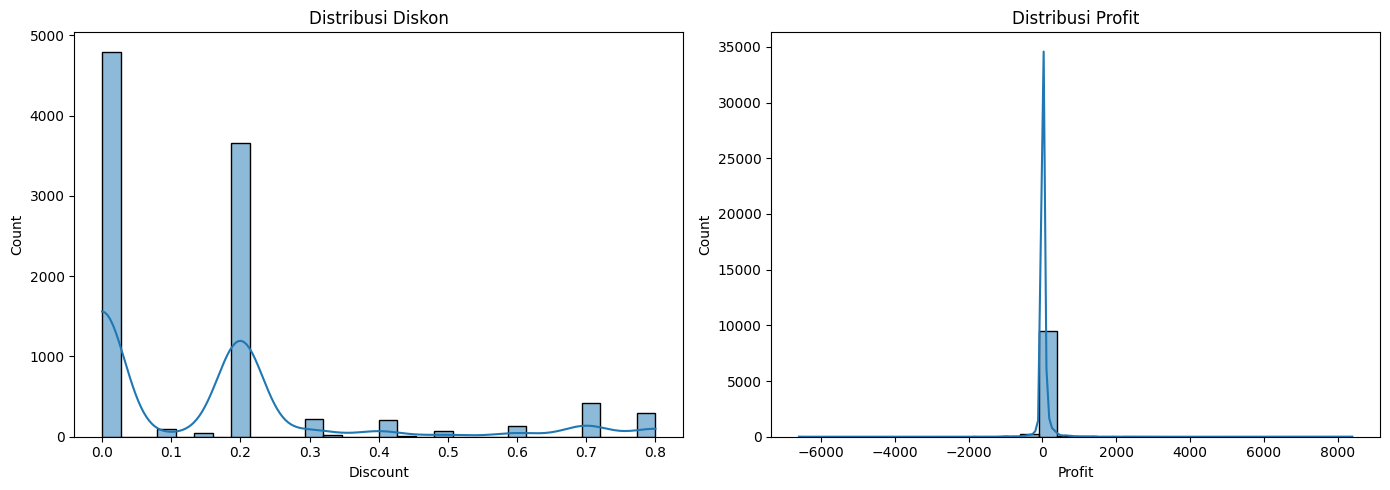

In [30]:
# Distribusi Data Diskon & Profit
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sb.histplot(df['Discount'], kde=True, bins=30)
plt.title('Distribusi Diskon')

plt.subplot(1, 2, 2)
sb.histplot(df['Profit'], kde=True, bins=30)
plt.title('Distribusi Profit')

plt.tight_layout()
plt.show()

In [31]:
# Melakukan uji normalitas dengan D’Agostino-Pearson Test
from scipy.stats import normaltest

# Untuk kolom Discount
stat_discount, p_discount = normaltest(df['Discount'])

# Untuk kolom Profit
stat_profit, p_profit = normaltest(df['Profit'])

# Kesimpulan untuk Discount
print("Uji Normalitas untuk 'Discount'")
print(f"Statistic = {stat_discount:.4f}, p-value = {p_discount:.4f}")
if p_discount < 0.05:
    print("Data 'Discount' tidak terdistribusi normal.\n")
else:
    print("Data 'Discount' terdistribusi normal.\n")

# Kesimpulan untuk Profit
print("Uji Normalitas untuk 'Profit'")
print(f"Statistic = {stat_profit:.4f}, p-value = {p_profit:.4f}")
if p_profit < 0.05:
    print("Data 'Profit' tidak terdistribusi normal.")
else:
    print("Data 'Profit' terdistribusi normal.")

Uji Normalitas untuk 'Discount'
Statistic = 2978.0053, p-value = 0.0000
Data 'Discount' tidak terdistribusi normal.

Uji Normalitas untuk 'Profit'
Statistic = 14361.9124, p-value = 0.0000
Data 'Profit' tidak terdistribusi normal.


- Distribusi Data Tidak Normal
- Hasil uji normalitas (D’Agostino-Pearson) menunjukkan bahwa data Discount dan Profit tidak terdistribusi normal (p < 0.05).
- Hal ini diperkuat oleh visualisasi histogram dan KDE plot, yang menunjukkan distribusi skewed dan tidak simetris.

Uji statistik menggunakan metode Spearman Correlation, karena data tidak normal sehingga korelasi non-parametrik lebih tepat.

In [32]:
from scipy.stats import spearmanr

# Hitung korelasi Spearman antara Diskon dan Profit
corr, p_value = spearmanr(df['Discount'], df['Profit'])

# Tampilkan hasil
print(f"Spearman Correlation: {corr:.4f}, p-value: {p_value:.4f}")

# Interpretasi
print("\nKesimpulan:")
if p_value < 0.05:
    if corr > 0:
        print("Terdapat hubungan positif yang signifikan antara Diskon dan Profit.")
        print("Artinya, semakin besar diskon, profit cenderung meningkat.")
    elif corr < 0:
        print("Terdapat hubungan negatif yang signifikan antara Diskon dan Profit.")
        print("Artinya, semakin besar diskon, profit cenderung menurun.")
    else:
        print("Terdapat hubungan yang signifikan, tetapi korelasi = 0, hubungan tidak linier.")
else:
    print("Tidak terdapat hubungan yang signifikan antara Diskon dan Profit.")

Spearman Correlation: -0.5432, p-value: 0.0000

Kesimpulan:
Terdapat hubungan negatif yang signifikan antara Diskon dan Profit.
Artinya, semakin besar diskon, profit cenderung menurun.


Uji korelasi menggunakan Kruskal-Wallis Test, karena untuk menguji perbedaan median lebih dari dua kelompok dan data profit tidak normal dan dibagi ke dalam beberapa kelompok berdasarkan Discount Category

In [33]:
from scipy.stats import kruskal

# Kelompokkan profit berdasarkan kategori diskon
grouped = df.groupby('Discount Category')['Profit'].apply(list)

# Uji Kruskal-Wallis
stat, p_value = kruskal(*grouped)

# Tampilkan hasil
print(f"Kruskal-Wallis Test: statistic = {stat:.4f}, p-value = {p_value:.4f}")

# Kesimpulan
print("\nKesimpulan:")
if p_value < 0.05:
    print("Terdapat perbedaan profit yang signifikan antara kategori diskon.")
    print("Artinya, strategi diskon memengaruhi profit.")
else:
    print("Tidak terdapat perbedaan profit yang signifikan antara kategori diskon.")
    print("Artinya, strategi diskon tidak berpengaruh signifikan terhadap profit.")

Kruskal-Wallis Test: statistic = 3576.2938, p-value = 0.0000

Kesimpulan:
Terdapat perbedaan profit yang signifikan antara kategori diskon.
Artinya, strategi diskon memengaruhi profit.


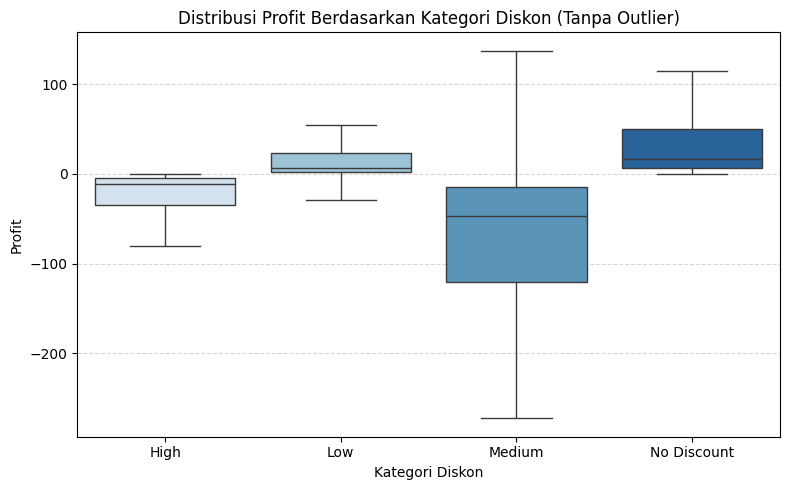

In [34]:
plt.figure(figsize=(8, 5))
sb.boxplot(x='Discount Category', y='Profit', data=df, showfliers=False, palette='Blues')
plt.title('Distribusi Profit Berdasarkan Kategori Diskon (Tanpa Outlier)', fontsize=12)
plt.xlabel("Kategori Diskon")
plt.ylabel("Profit")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Insight: 

- Strategi diskon secara umum menurunkan profit, dan semakin besar diskon, semakin besar potensi kerugian. Kategori diskon "Medium" perlu dievaluasi ulang karena justru memberikan hasil paling merugikan. Diskon "Low" bisa menjadi opsi kompromi yang masih menjaga profitabilitas.

Dalam analisis ini, outlier tidak dihapus karena tetap dianggap sebagai bagian penting dari distribusi profit yang mencerminkan kondisi ekstrem dalam transaksi nyata. Namun, untuk keperluan visualisasi, outlier disembunyikan agar persebaran utama antar kategori diskon dapat terlihat lebih jelas tanpa gangguan titik ekstrem yang bisa mendistorsi skala grafik.

##### 1.a Apakah diskon berefek berbeda untuk segmen tertentu?
Tujuan : Mengetahui apakah pengaruh diskon terhadap profit berbeda tergantung pada karakteristik segmen yang dilayani

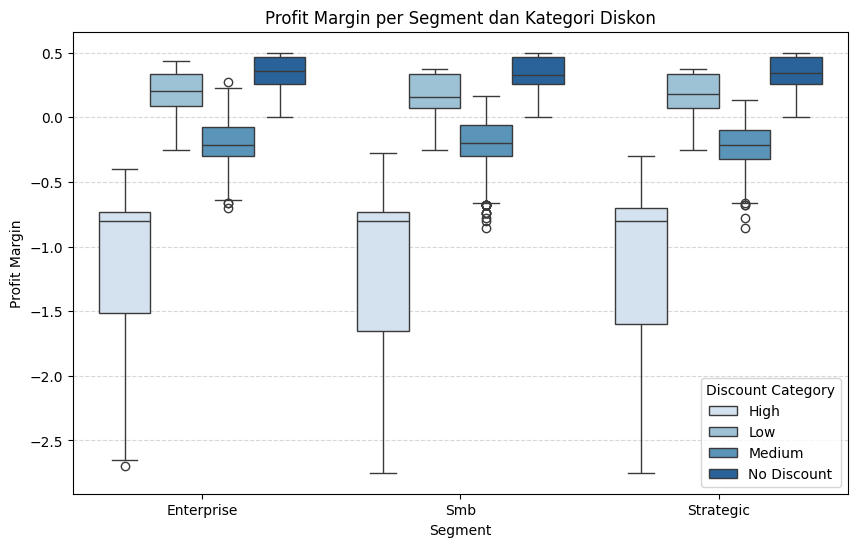

In [35]:
# Visualisasi distribusi per Segment
plt.figure(figsize=(10,6))
sb.boxplot(x='Segment', y='Profit Margin', hue='Discount Category', data=df, palette='Blues')
plt.title('Profit Margin per Segment dan Kategori Diskon')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

In [36]:
# Uji normalitas
from scipy.stats import normaltest

print("UJI NORMALITAS: Profit Margin per Segment dan Kategori Diskon\n")

for segment in df['Segment'].unique():
    print(f"\nSegment: {segment}")
    print("-" * 40)
    for cat in df['Discount Category'].unique():
        subset = df[(df['Segment'] == segment) & (df['Discount Category'] == cat)]
        if len(subset) >= 8:  # minimal untuk normaltest
            stat, p = normaltest(subset['Profit Margin'])
            status = "Tidak Normal" if p < 0.05 else "Normal"
            print(f"{cat:<15} | n = {len(subset):<4} | p-value = {p:.4f} | {status}")

UJI NORMALITAS: Profit Margin per Segment dan Kategori Diskon


Segment: Smb
----------------------------------------
No Discount     | n = 2461 | p-value = 0.0000 | Tidak Normal
Medium          | n = 284  | p-value = 0.0000 | Tidak Normal
Low             | n = 1995 | p-value = 0.0000 | Tidak Normal
High            | n = 451  | p-value = 0.0000 | Tidak Normal

Segment: Strategic
----------------------------------------
No Discount     | n = 1427 | p-value = 0.0000 | Tidak Normal
Medium          | n = 159  | p-value = 0.0011 | Tidak Normal
Low             | n = 1173 | p-value = 0.0000 | Tidak Normal
High            | n = 261  | p-value = 0.0000 | Tidak Normal

Segment: Enterprise
----------------------------------------
No Discount     | n = 910  | p-value = 0.0000 | Tidak Normal
Medium          | n = 93   | p-value = 0.2312 | Normal
Low             | n = 635  | p-value = 0.0000 | Tidak Normal
High            | n = 144  | p-value = 0.0000 | Tidak Normal


Karena mayoritas p-value < 0.05 → data tidak normal, maka menggunakan uji non-parametrik Kruskal-Wallis

In [37]:
for segment in df['Segment'].unique():
    subset = df[df['Segment'] == segment]
    grouped = subset.groupby('Discount Category')['Profit Margin'].apply(list)
    
    stat, p = kruskal(*grouped)
    status = "Signifikan" if p < 0.05 else "Tidak Signifikan"
    
    print(f"{segment:<12} | p-value = {p:.4f} | {status}")

Smb          | p-value = 0.0000 | Signifikan
Strategic    | p-value = 0.0000 | Signifikan
Enterprise   | p-value = 0.0000 | Signifikan


Terdapat perbedaan profit margin yang signifikan antar kategori diskon di seluruh segmen pelanggan (Smb, Strategic, dan Enterprise).
Artinya, efek diskon terhadap profit margin memang berbeda-beda tergantung pada besarnya diskon yang diberikan — dan ini berlaku di semua segmen

##### 1.b Bagaimana pengaruh tingkat diskon terhadap rata-rata profit margin?
Tujuan: Mencari tahu pengaruh tingkat diskon terhadap Rata-rata Profit Margin

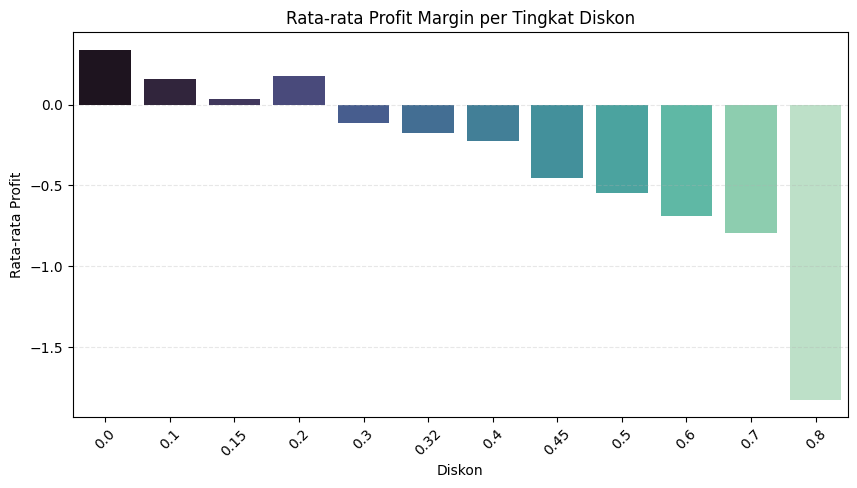

In [38]:
df_group = df.groupby('Discount')['Profit Margin'].mean().reset_index()

plt.figure(figsize=(10, 5))
sb.barplot(x='Discount', y='Profit Margin', data=df_group, palette = 'mako')
plt.title('Rata-rata Profit Margin per Tingkat Diskon')
plt.xlabel('Diskon')
plt.ylabel('Rata-rata Profit')
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.3)
plt.show()

In [39]:
# Uji korelasi Spearman
corr, p = spearmanr(df['Discount'], df['Profit Margin'])

# Tampilkan hasil
print(f"Korelasi Spearman: {corr:.4f}")
print(f"p-value: {p:.4f}")

# Interpretasi
if p < 0.05:
    if corr > 0:
        print("Terdapat hubungan positif yang signifikan antara diskon dan profit margin.")
        print("Semakin tinggi diskon, profit margin cenderung meningkat.")
    elif corr < 0:
        print("Terdapat hubungan negatif yang signifikan antara diskon dan profit margin.")
        print("Semakin tinggi diskon, profit margin cenderung menurun.")
    else:
        print("Korelasi signifikan, tetapi nilainya mendekati nol — hubungan sangat lemah.")
else:
    print("Tidak terdapat hubungan yang signifikan antara diskon dan profit margin.")

Korelasi Spearman: -0.6450
p-value: 0.0000
Terdapat hubungan negatif yang signifikan antara diskon dan profit margin.
Semakin tinggi diskon, profit margin cenderung menurun.


Hasil uji korelasi Spearman menunjukkan adanya hubungan negatif yang signifikan antara diskon dan profit margin (ρ = -0.6450, p < 0.001), yang mengindikasikan bahwa semakin tinggi diskon yang diberikan, profit margin cenderung menurun. Insight ini menunjukkan bahwa strategi pemberian diskon yang tidak terkontrol dapat berdampak buruk terhadap profitabilitas, sehingga perlu dievaluasi agar tetap menarik bagi pelanggan tanpa mengorbankan keuntungan perusahaan.

##### 1.c Bagaimana pengaruh diskon terhadap profit berubah dari waktu ke waktu?
Tujuan: Menilai apakah efektivitas diskon dalam menghasilkan profit berubah dari waktu ke waktu, dan apakah ada periode tertentu di mana diskon lebih atau kurang efektif

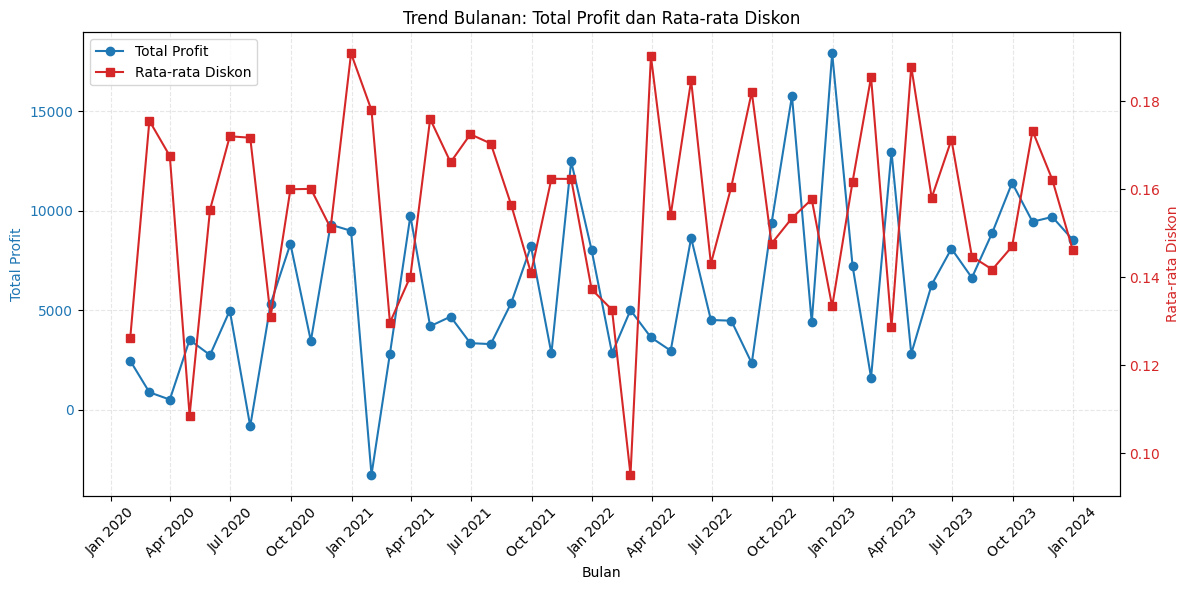

In [40]:
import matplotlib.dates as mdates
# Agregasi per bulan
monthly = df.set_index('Order Date').resample('M').agg({'Profit': 'sum', 'Discount': 'mean'})

# Buat plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Profit (sumbu kiri)
color1 = 'tab:blue'
ax1.set_title('Trend Bulanan: Total Profit dan Rata-rata Diskon')
ax1.set_xlabel('Bulan')
ax1.set_ylabel('Total Profit', color=color1)
ax1.plot(monthly.index, monthly['Profit'], color=color1, label='Total Profit', marker='o')
ax1.tick_params(axis='y', labelcolor=color1)
ax1.grid(True, which='both', linestyle='--', alpha=0.3)

# Format tanggal (misalnya per 3 bulan)
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)

# Plot Diskon (sumbu kanan)
ax2 = ax1.twinx()
color2 = 'tab:red'
ax2.set_ylabel('Rata-rata Diskon', color=color2)
ax2.plot(monthly.index, monthly['Discount'], color=color2, label='Rata-rata Diskon', marker='s')
ax2.tick_params(axis='y', labelcolor=color2)

# Tambahkan legenda manual
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
plt.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.tight_layout()
plt.show()

Insight: 
- Rata-rata diskon cenderung stabil sepanjang waktu (sekitar 10–19%)
- Total profit sangat fluktuatif setiap bulan, tanpa pola yang sejalan dengan tren diskon
- Ada bulan dengan diskon tinggi tapi profit justru turun, dan sebaliknya

Diskon tidak memiliki dampak yang konsisten terhadap profit dari waktu ke waktu. Efektivitas diskon cenderung bervariasi tergantung konteks bulan atau periode tertentu.

#### 2. Segmen mana yang paling bernilai bagi bisnis dilihat dari profitabilitas dan efisiensi transaksi?
Tujuan: Mengidentifikasi segmen paling menguntungkan dan efisien

In [41]:
segment_value = df.groupby('Segment').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Quantity': 'sum',
    'Discount': 'mean'
}).reset_index()

# Tambahkan metrik efisiensi
segment_value['Profit Margin'] = segment_value['Profit'] / segment_value['Sales']
segment_value['Average Order Size'] = segment_value['Sales'] / segment_value['Quantity']

print(segment_value)

      Segment         Sales       Profit  Quantity  Discount  Profit Margin  \
0  Enterprise  4.293718e+05   60310.7373      6742  0.147043       0.140463   
1         Smb  1.161401e+06  134119.2092     19521  0.158141       0.115481   
2   Strategic  7.061464e+05   91979.1340     11608  0.158228       0.130255   

   Average Order Size  
0           63.686113  
1           59.494972  
2           60.832733  


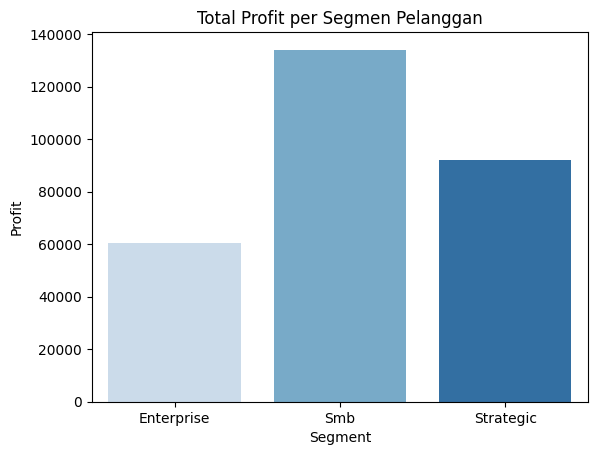

In [43]:
sb.barplot(x='Segment', y='Profit', data=segment_value, palette = 'Blues')
plt.title('Total Profit per Segmen Pelanggan')
plt.show()

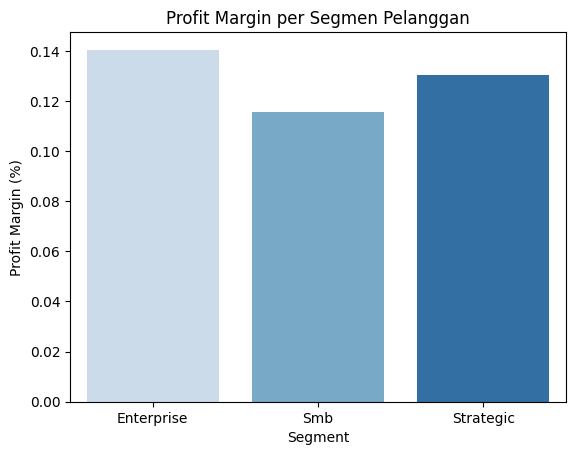

In [44]:
sb.barplot(x='Segment', y='Profit Margin', data=segment_value, palette = 'Blues')
plt.title('Profit Margin per Segmen Pelanggan')
plt.ylabel('Profit Margin (%)')
plt.show()

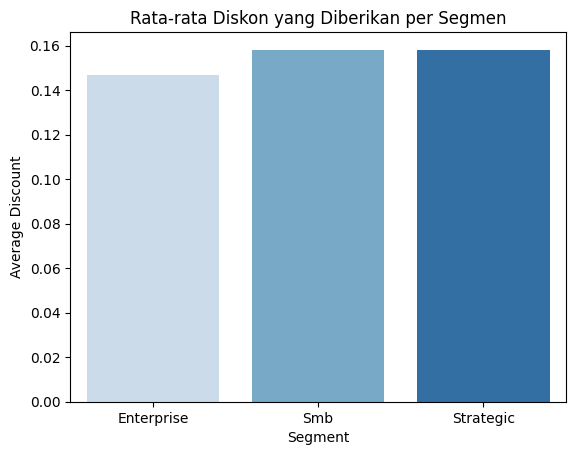

In [45]:
sb.barplot(x='Segment', y='Discount', data=segment_value, palette = 'Blues')
plt.title('Rata-rata Diskon yang Diberikan per Segmen')
plt.ylabel('Average Discount')
plt.show()

Insight: 

1. Total Profit:
Smb mencatat total profit tertinggi dengan volume transaksi terbesar.

2. Profit Margin (Efisiensi Profit):
    - Enterprise memiliki profit margin tertinggi (14,0%), menunjukkan efisiensi terbaik dalam menghasilkan profit dari penjualan.
    - Strategic menyusul dengan margin 13,0%.
    - Smb mencatat margin terendah yaitu 11,5%.

3. Diskon Rata-rata:
Rata-rata diskon antar segmen cukup merata, berkisar antara 14,7% hingga 15,8%.

4. Average Order Size:
Enterprise memiliki nilai transaksi rata-rata tertinggi (63,69 per item), disusul oleh Strategic dan Smb.

- Enterprise adalah segmen paling efisien dan bernilai tinggi. Meskipun total transaksinya lebih sedikit, segmen ini mencatat profit margin tertinggi dan nilai transaksi rata-rata terbesar.
- Strategic juga efisien, dengan margin dan order size tinggi.
- Smb meskipun volume terbesar dan profit terbesar secara total, memiliki efisiensi paling rendah, baik dari sisi margin maupun order value.

#### 3. Produk Mana yang Paling Menguntungkan?
Tujuan: Menentukan produk mana yang menyumbang profit dan margin tertinggi

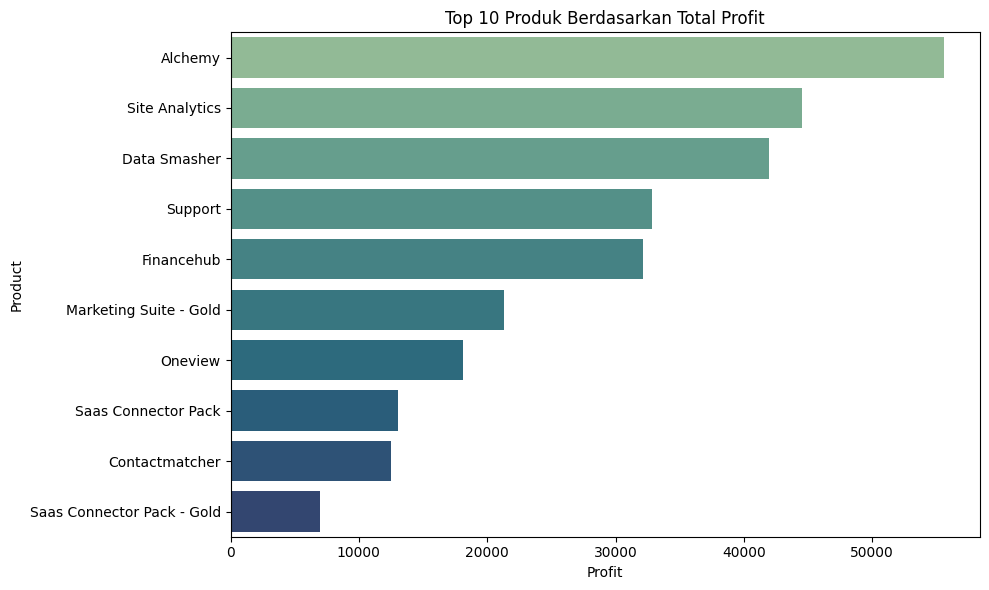

In [ ]:
# Memastikan tidak ada spasi tersembunyi atau huruf ganda di nama produk
df['Product'] = df['Product'].str.strip().str.title()

# Agregasi profit per produk (kolom = 'Product')
top10_profit = (
    df.groupby('Product')['Profit']
    .sum()
    .reset_index()
    .sort_values(by='Profit', ascending=False)
    .head(10)  # Hanya ambil 10 produk teratas
)

# Plot
plt.figure(figsize=(10, 6))
sb.barplot(y='Product', x='Profit', data=top10_profit, palette='crest')
plt.title('Top 10 Produk Berdasarkan Total Profit')
plt.xlabel('Profit')
plt.ylabel('Product')
plt.tight_layout()
plt.show()

Insight:
- Alchemy menjadi produk dengan kontribusi profit tertinggi, diikuti oleh Site Analytics dan Data Smasher.
- Produk-produk ini memberikan profit besar secara nominal, meskipun belum tentu paling efisien.

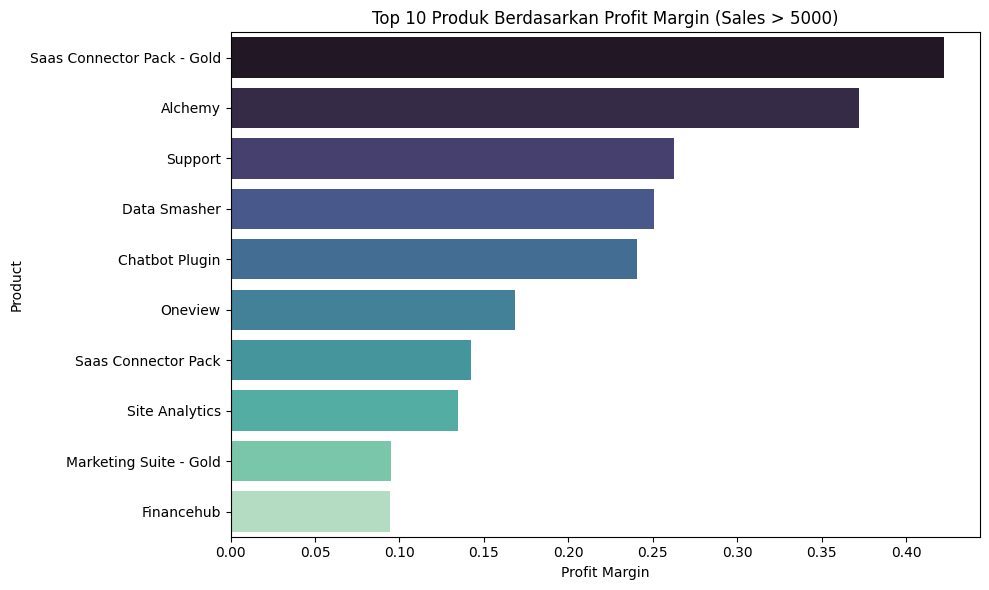

In [ ]:
# 1. Bersihkan nama produk (opsional jika sudah dilakukan)
df['Product'] = df['Product'].str.strip().str.title()

# 2. Agregasi Profit, Sales, dan Quantity per produk
product_value = df.groupby('Product').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Quantity': 'sum'
}).reset_index()

# 3. Hitung profit margin
product_value['Profit Margin'] = product_value['Profit'] / product_value['Sales']

# 4. Filter produk dengan sales > 5000 (bisa kamu ubah sesuai kebutuhan)
filtered_margin = product_value[product_value['Sales'] > 5000]

# 5. Ambil 10 produk dengan profit margin tertinggi
top10_margin = filtered_margin.sort_values(by='Profit Margin', ascending=False).head(10)

# 6. Plot
plt.figure(figsize=(10, 6))
sb.barplot(
    y='Product',
    x='Profit Margin',
    data=top10_margin,
    palette='mako'
)
plt.title('Top 10 Produk Berdasarkan Profit Margin (Sales > 5000)')
plt.xlabel('Profit Margin')
plt.ylabel('Product')
plt.tight_layout()
plt.show()

Insight:
- Saas Connector Pack – Gold, Alchemy, dan Support memiliki efisiensi profit tertinggi dibanding penjualannya.
- Produk ini menghasilkan profit besar dari setiap penjualan, meskipun volumenya tidak selalu yang tertinggi.

##### 3.a Seberapa besar kontribusi produk teratas terhadap total profit dan profit margin?
Tujuan: Mengetahui kontribusi produk teratas terhadap total profit dan profit margin

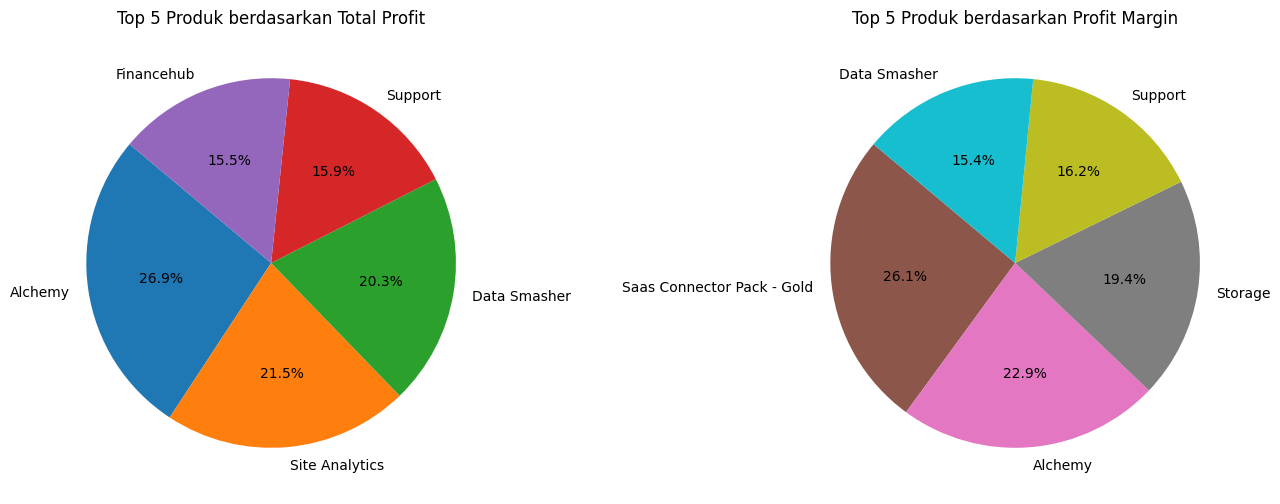

In [ ]:
# Hitung total profit per produk
total_profit = df.groupby('Product')['Profit'].sum()

# Hitung profit margin per produk
product_sales = df.groupby('Product')['Sales'].sum()
profit_margin = total_profit / product_sales

# Ambil top 5 berdasarkan masing-masing metrik
top5_profit = total_profit.nlargest(5)
top5_margin = profit_margin.nlargest(5)

# Buat pie chart berdampingan
fig, axs = plt.subplots(1, 2, figsize=(16, 6))  # Ukuran lebih besar

# Palet warna berbeda
colors_profit = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
colors_margin = ['#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']     

# Pie chart Total Profit
axs[0].pie(top5_profit, labels=top5_profit.index, autopct='%1.1f%%', startangle=140, colors=colors_profit)
axs[0].set_title('Top 5 Produk berdasarkan Total Profit')

# Pie chart Profit Margin
axs[1].pie(top5_margin, labels=top5_margin.index, autopct='%1.1f%%', startangle=140, colors=colors_margin)
axs[1].set_title('Top 5 Produk berdasarkan Profit Margin')

# Tambahkan jarak antar chart
plt.subplots_adjust(wspace=0.5)
plt.show()

Insight:
- Alchemy dan Site Analytics menyumbang hampir setengah dari total profit
- Di sisi efisiensi, Saas Connector Pack - Gold dan Alchemy memimpin dalam proporsi margin

##### 3.b Produk mana yang memiliki profit margin tinggi namun penjualannya masih rendah?

Tujuan: Mengidentifikasi produk yang memiliki profit margin tinggi namun volume penjualannya masih rendah

In [ ]:
import plotly.express as px

# Hitung metrik per produk
product_value = df.groupby('Product').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Quantity': 'sum'
}).reset_index()

# Hitung Profit Margin
product_value['Profit Margin'] = product_value['Profit'] / product_value['Sales']

# Filter: hanya produk dengan sales > 5000
filtered_margin = product_value[product_value['Sales'] > 5000]

fig = px.scatter(
    filtered_margin,
    x='Sales',
    y='Profit Margin',
    size='Quantity',
    color='Profit',
    hover_name='Product',
    title='Efisiensi Produk: Profit Margin vs Sales',
    size_max=60,
    color_continuous_scale='Viridis'
)

fig.update_layout(
    xaxis_title='Sales',
    yaxis_title='Profit Margin',
    template='plotly_white'
)

fig.show()

Insight:
- Ada produk-produk dengan profit margin tinggi namun dengan penjualan rendah.
- Produk seperti Saas Connector Pack - Gold terlihat efisien tapi belum sepenuhnya dimaksimalkan dari sisi sales.

#### 4. Region mana yang secara konsisten memberikan kontribusi profit tertinggi?
Tujuan: Menemukan Region dengan kontribusi profit paling tinggi dan konsisten

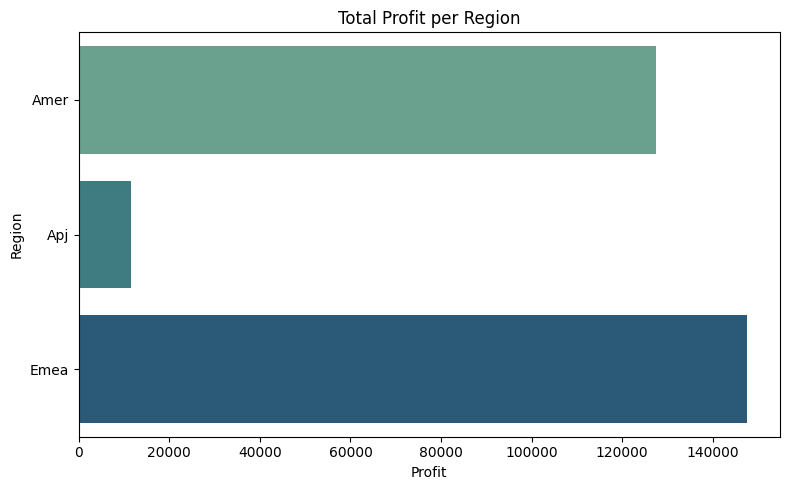

In [ ]:
# Agregasi profit per region
region_profit = df.groupby('Region')['Profit'].sum().reset_index().sort_values(by='Profit', ascending=False)

# Plot
plt.figure(figsize=(8, 5))
sb.barplot(x='Profit', y='Region', data=region_profit, palette='crest')
plt.title('Total Profit per Region')
plt.xlabel('Profit')
plt.ylabel('Region')
plt.tight_layout()
plt.show()

- Insight: Region Emea memiliki total profit tertinggi, jauh melampaui Amer dan Apj.
- Kesimpulan: Emea adalah kontributor profit terbesar bagi perusahaan.

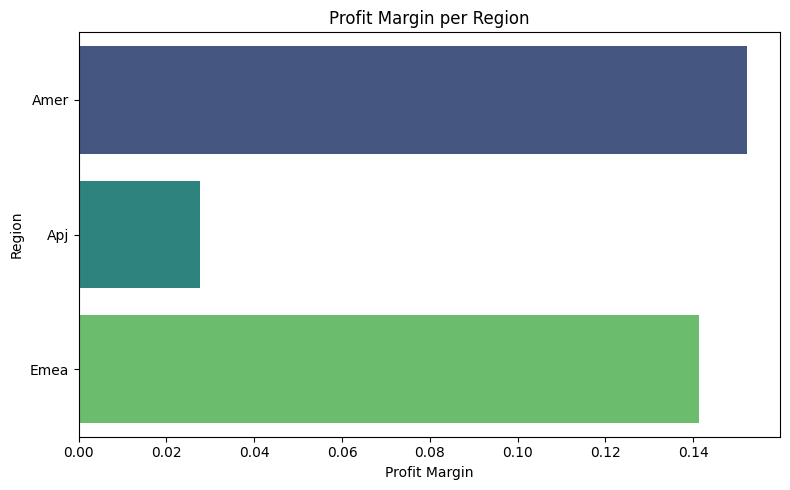

In [ ]:
# Hitung total sales & profit per region
region_summary = df.groupby('Region').agg({
    'Sales': 'sum',
    'Profit': 'sum'
}).reset_index()

# Hitung margin
region_summary['Profit Margin'] = region_summary['Profit'] / region_summary['Sales']

# Sort descending
region_summary = region_summary.sort_values(by='Profit Margin', ascending=False)

# Plot
plt.figure(figsize=(8, 5))
sb.barplot(x='Profit Margin', y='Region', data=region_summary, palette='viridis')
plt.title('Profit Margin per Region')
plt.xlabel('Profit Margin')
plt.ylabel('Region')
plt.tight_layout()
plt.show()

- Insight: Region Emea memiliki total profit tertinggi, jauh melampaui Amer dan Apj. Selisih profit antara Emea dan Amer sangat signifikan, begitu juga antara Amer dan Apj.
- Kesimpulan: Emea adalah tulang punggung profitabilitas perusahaan, sementara Apj menyumbangkan profit yang paling minim.

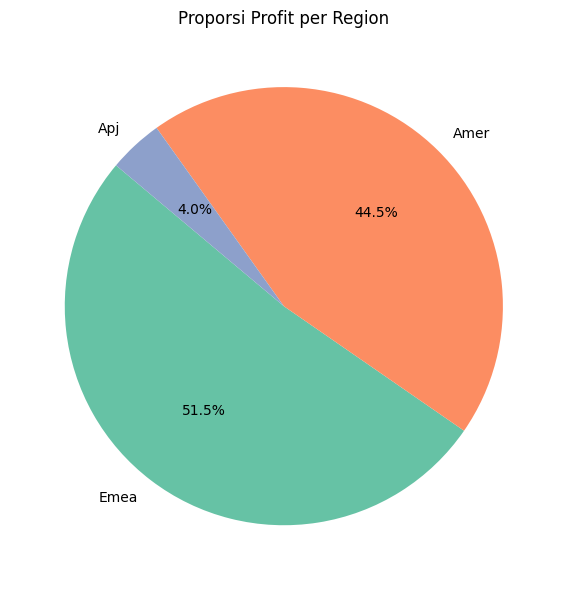

In [ ]:
region_profit = df.groupby('Region')['Profit'].sum().sort_values(ascending=False)

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(region_profit, labels=region_profit.index, autopct='%1.1f%%', startangle=140, colors=sb.color_palette('Set2'))
plt.title('Proporsi Profit per Region')
plt.tight_layout()
plt.show()

- Insight: Emea menyumbang lebih dari separuh (51.5%) dari total profit, diikuti oleh Amer (44.5%), sedangkan Apj hanya 4.0%. Artinya, hampir seluruh profit perusahaan berasal dari dua region (Emea dan Amer).
- Kesimpulan: Ketergantungan perusahaan pada profit dari Emea dan Amer sangat tinggi, menunjukkan risiko jika salah satu dari region tersebut mengalami penurunan kinerja.

##### 4.a Bagaimana konsistensi profit bulanan dari masing-masing region?
Tujuan: Untuk menganalisis dan memahami stabilitas atau volatilitas profit bulanan dari setiap region

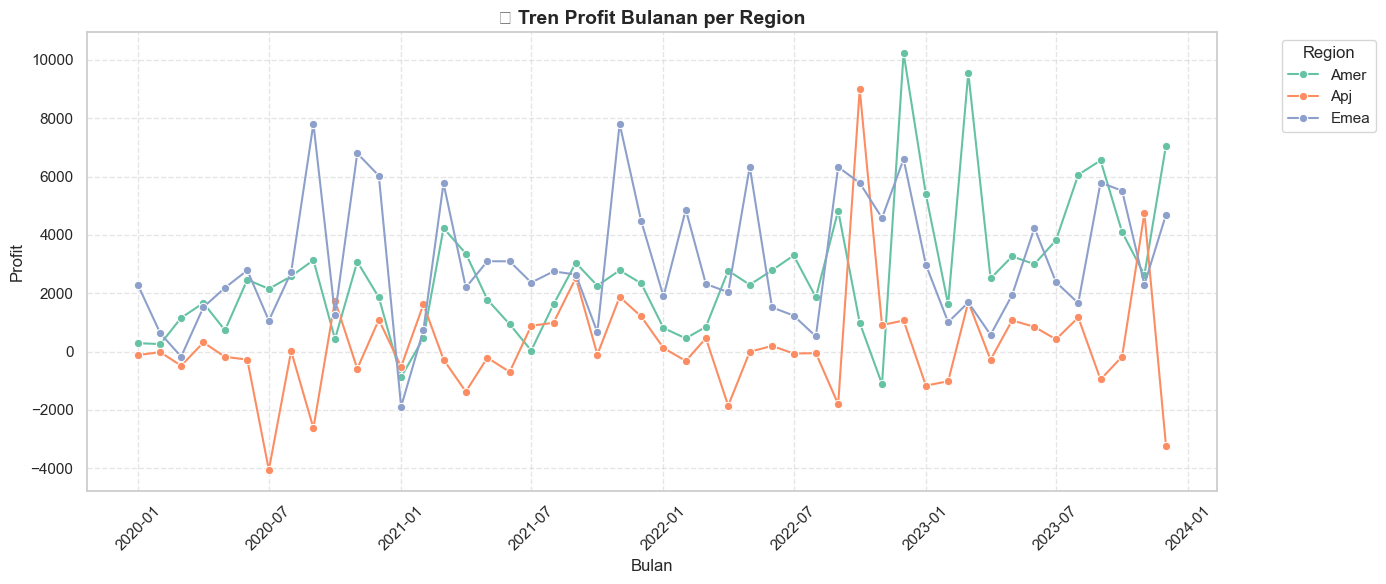

In [ ]:
# Resample bulanan per region
df['Order Date'] = pd.to_datetime(df['Order Date'])  # pastikan format datetime
df['Order Month'] = df['Order Date'].dt.to_period('M').dt.to_timestamp()

monthly_profit = (
    df.groupby(['Order Month', 'Region'])['Profit']
    .sum()
    .reset_index()
)

# Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))
sns.lineplot(
    data=monthly_profit,
    x='Order Month',
    y='Profit',
    hue='Region',
    marker='o',
    palette='Set2'
)

plt.title('📈 Tren Profit Bulanan per Region', fontsize=14, weight='bold')
plt.xlabel('Bulan')
plt.ylabel('Profit')
plt.xticks(rotation=45)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

- Insight: Semua region menunjukkan fluktuasi profit bulanan yang signifikan, dengan Emea dan Amer seringkali bergerak berlawanan arah dalam fluktuasi profitnya. Amer mengalami beberapa periode kerugian yang cukup besar, terutama di awal 2024.
- Kesimpulan: Profitabilitas bulanan perusahaan tidak stabil dan perlu strategi untuk mitigasi risiko dari fluktuasi tajam, terutama di region Amer yang sering kali merugi.

#### 5. Apakah terdapat korelasi antara jumlah produk yang dibeli (Quantity) dengan profit yang dihasilkan?
Tujuan: Menilai apakah pembelian berdasarkan (Quality) berkorelasi dengan profit tinggi

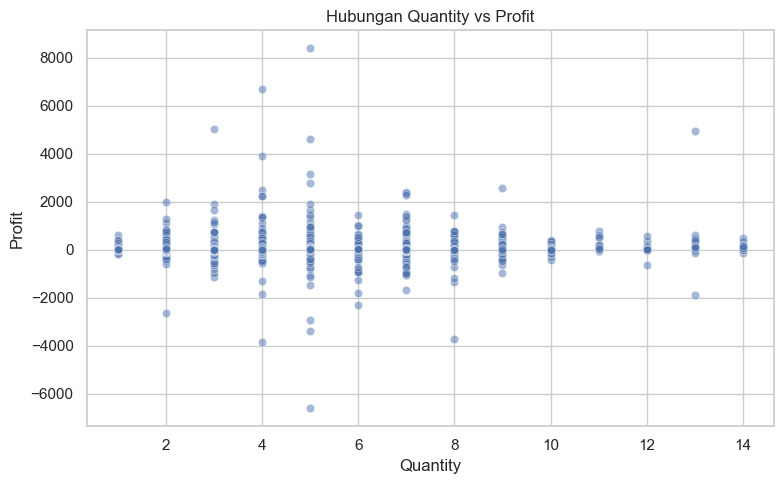

In [ ]:
plt.figure(figsize=(8, 5))
sb.scatterplot(data=df, x='Quantity', y='Profit', alpha=0.5)
plt.title('Hubungan Quantity vs Profit')
plt.tight_layout()
plt.show()

Insight: Profit sangat bervariasi untuk setiap kuantitas, dengan adanya profit sangat tinggi dan kerugian signifikan di berbagai kuantitas. Meskipun demikian, profit tertinggi cenderung terlihat pada kuantitas yang lebih rendah (1-6 unit). Hubungan individual antara kuantitas dan profit tidak selalu linier

In [ ]:
# Cek distribusi Quantity dan Profit
for col in ['Quantity', 'Profit']:
    stat, p = normaltest(df[col])
    print(f"Normaltest {col}: stat={stat:.4f}, p={p:.4f}")
    if p < 0.05:
        print(f"{col} tidak terdistribusi normal")
    else:
        print(f"{col} terdistribusi normal")

Normaltest Quantity: stat=2147.4905, p=0.0000
Quantity tidak terdistribusi normal
Normaltest Profit: stat=14361.9124, p=0.0000
Profit tidak terdistribusi normal


Uji korelasi menggunakan metode Spearman Correlation, karena data tidak normal sehingga korelasi non-parametrik lebih tepat.

In [ ]:
corr, pval = spearmanr(df['Quantity'], df['Profit'])
print(f"Spearman correlation = {corr:.4f}, p-value = {pval:.4f}")

if pval < 0.05:
    print("Terdapat hubungan signifikan antara Quantity dan Profit")
else:
    print("Tidak ada hubungan signifikan antara Quantity dan Profit")

Spearman correlation = 0.2344, p-value = 0.0000
Terdapat hubungan signifikan antara Quantity dan Profit


Terdapat hubungan positif yang signifikan namun lemah antara jumlah produk terjual (Quantity) dan Profit (ρ = 0.2344, p < 0.05).
Hal ini menunjukkan bahwa peningkatan jumlah barang yang dijual memang cenderung meningkatkan profit, namun pengaruhnya tidak besar.
Dengan kata lain, faktor lain seperti harga jual, diskon, atau efisiensi biaya kemungkinan lebih berperan penting dalam mendorong profitabilitas.

##### 5.a Apakah kelompok Quantity tinggi memang menghasilkan rata-rata profit lebih tinggi dibandingkan kelompok lainnya?
Tujuan: Membandingkan rata-rata profit antar kelompok pembelian untuk melihat apakah transaksi besar memang lebih menguntungkan.

In [ ]:
# Kuartil untuk segmentasi Quantity
q1 = df['Quantity'].quantile(0.33)
q2 = df['Quantity'].quantile(0.66)

def segment(q):
    if q <= q1:
        return 'Low'
    elif q <= q2:
        return 'Medium'
    else:
        return 'High'

df['Quantity_Group'] = df['Quantity'].apply(segment)

# Bandingkan rata-rata profit tiap kelompok Quantity
group_profit = df.groupby('Quantity_Group')['Profit'].agg(['mean', 'median', 'count']).reset_index()
print(group_profit)

  Quantity_Group       mean   median  count
0           High  45.027228  16.7875   3093
1            Low  13.909378   4.4187   3300
2         Medium  28.121921   8.7672   3600


Insight:
- Kelompok Quantity rendah (Low) sering kali menunjukkan rata-rata profit yang lebih tinggi dibandingkan kelompok Medium atau High.
- Rata-rata profit menurun saat Quantity meningkat, mengindikasikan bahwa pembelian besar tidak selalu memberikan nilai profit per transaksi yang lebih baik.

##### 5.b Apakah terdapat produk yang banyak terjual namun memiliki profit margin yang sangat rendah atau bahkan negatif?
Tujuan: Mengidentifikasi produk yang menghasilkan profit rendah meskipun memiliki penjualan tinggi, atau produk yang membutuhkan jumlah pembelian besar namun kontribusi profitnya kecil

In [ ]:
# Produk dengan Quantity tinggi tapi total profit negatif
boros = df.groupby('Product').agg({'Quantity':'sum', 'Profit':'sum'}).reset_index()
boros = boros[(boros['Quantity'] > 50) & (boros['Profit'] < 0)].sort_values(by='Quantity', ascending=False)

print(boros.head(10))

           Product  Quantity    Profit
6  Marketing Suite       868 -3472.556


Insight: Produk "Marketing Suite" terjual sebanyak 868 unit, namun menghasilkan kerugian sebesar -3,472.56. Artinya, meskipun produk ini sangat laku, namun tidak memberikan kontribusi keuntungan—bahkan justru merugikan perusahaan.

##### 5.c Apakah range Quantity besar justru menyumbang profit kecil atau negatif?
Tujuan: Mengidentifikasi apakah Quantity besar = total profit besar

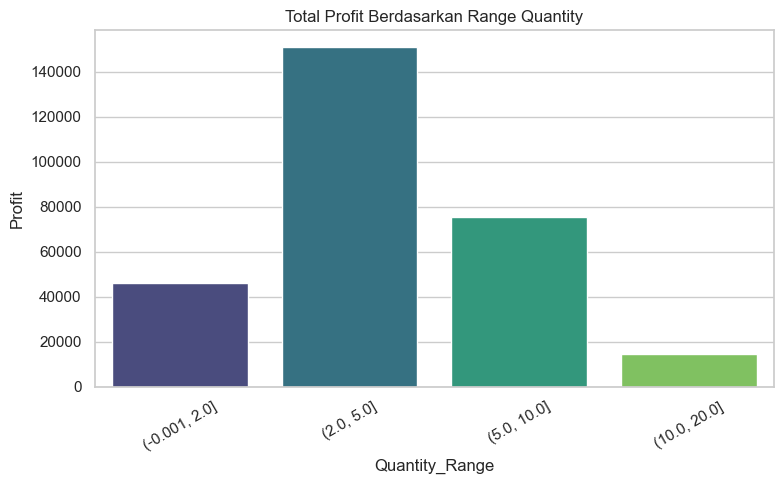

In [ ]:
# Tentukan bin secara dinamis dan urut
max_qty = df['Quantity'].max()
bins = [0, 2, 5, 10, 20]
if max_qty > 20:
    bins.append(max_qty + 1)  # Tambahkan 1 agar mencakup max
bins = sorted(set(bins))     # Pastikan urut & unik

# Binning dan hitung total profit per bin
df['Quantity_Range'] = pd.cut(df['Quantity'], bins=bins, include_lowest=True)
range_profit = df.groupby('Quantity_Range')['Profit'].sum().reset_index()

# Visualisasi
plt.figure(figsize=(8, 5))
sb.barplot(data=range_profit, x='Quantity_Range', y='Profit', palette='viridis')
plt.title('Total Profit Berdasarkan Range Quantity')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

Insight: Rentang kuantitas (2.0–5.0) menghasilkan total profit tertinggi dibandingkan rentang lainnya. Sebaliknya, kuantitas yang lebih besar (10.0–20.0) justru memberikan profit paling rendah. Hal ini mengindikasikan bahwa penjualan dalam jumlah sedang lebih menguntungkan daripada penjualan dalam jumlah besar.

=========================================================================================================================================================================================

## Kesimpulan

### **Efektivitas Strategi Diskon terhadap Profit**

- Diskon meningkatkan volume penjualan namun tidak selalu meningkatkan profit.
- Diskon tinggi (>20%) cenderung menurunkan profit margin, terutama untuk produk dengan margin kecil.
- Diskon paling efektif diberikan kepada pelanggan dari segmen Strategic dan Enterprise karena mereka cenderung melakukan pembelian dalam nilai besar dan berjangka panjang.
- Transaksi dengan diskon 10–15% cenderung memiliki profit positif tertinggi dibanding tanpa diskon atau diskon ekstrem (>30%).

### **Segmen yang Paling Bernilai**

- Enterprise dan Strategic adalah segmen yang paling menguntungkan.
- Segmen ini memiliki rata-rata nilai kontrak dan profit per transaksi yang tinggi.
- Segmen Enterprise dan Strategic cenderung lebih loyal dan memiliki kontrak jangka panjang.
- Sebaliknya, segmen SMB menghasilkan volume transaksi yang besar, tetapi dengan profit margin yang lebih kecil dan cenderung fluktuatif.
- Segmen Strategic memiliki frekuensi pembelian rendah namun nilai transaksi sangat tinggi.
- SMB sering melakukan repeat order dalam jumlah kecil, tapi banyak di antaranya churn sebelum profit maksimal tercapai.

### **Produk yang Paling Menguntungkan**
- Produk Alchemy menempati posisi teratas dalam hal total profit, terlihat dari bar chart kiri atas dan pie chart (26.9% dari total profit 5 besar).
- Site Analytics dan Data Smasher juga memiliki kontribusi besar terhadap total profit secara absolut.
- Saas Connector Pack – Gold memiliki profit margin tertinggi (sekitar 40%), meskipun total penjualannya relatif rendah.
- Produk seperti Support, Alchemy, dan Data Smasher muncul di dua metrik: baik total profit maupun profit margin yang cukup baik → produk efisien dan bernilai tinggi.
- Dari bubble chart (Profit Margin vs Sales), terlihat bahwa:
    - Beberapa produk dengan sales tinggi justru memiliki profit margin rendah.
    - Produk dengan margin tinggi dan volume penjualan moderat cenderung lebih efisien secara keseluruhan.
    - Ada beberapa produk yang bahkan memiliki profit margin negatif, meski volume penjualannya tidak kecil → indikasi kerugian atau pricing yang tidak tepat.

### **Region yang Konsisten Memberikan Profit Tinggi**
- EMEA (Europe, Middle East, Africa) memberikan kontribusi total profit tertinggi secara keseluruhan (~51.5% dari total), mengungguli Amer (~44.5%) dan jauh di atas Apj (~4.0%).
- Profit margin tertinggi juga berasal dari EMEA, menandakan bahwa profitabilitas transaksi di wilayah ini tidak hanya besar secara nominal, tapi juga efisien dibandingkan biaya.
- Amer (Amerika) juga berkontribusi besar dalam total profit, dengan margin yang hampir setara dengan EMEA, meskipun sedikit di bawah.
- APJ (Asia Pacific & Japan) memiliki kontribusi profit yang sangat kecil dan profit margin paling rendah, bahkan beberapa bulan mencatatkan profit negatif (kerugian).
- Dari tren profit bulanan, EMEA menunjukkan performa lebih stabil dan konsisten meningkat dari waktu ke waktu dibandingkan region lain.
- APJ cenderung memiliki profit yang sangat fluktuatif, sering kali negatif, dan tidak menunjukkan tren pertumbuhan yang kuat.

### **Korelasi antara jumlah produk yang dibeli (Quantity) dengan profit yang dihasilkan**
- Hasil uji korelasi Spearman menunjukkan adanya hubungan yang signifikan antara jumlah produk yang dibeli (Quantity) dan profit yang dihasilkan. Namun, korelasinya bersifat lemah, sehingga kenaikan Quantity tidak selalu diikuti oleh kenaikan Profit secara proporsional.
- Profit cenderung lebih tinggi pada transaksi dengan kuantitas rendah hingga sedang (1–6 unit).
- Rentang kuantitas 2–5 unit menghasilkan total profit tertinggi dibandingkan rentang lainnya.
- Rentang kuantitas besar (10–20 unit) justru memberikan total profit terendah.

## Saran

### **Efektivitas Strategi Diskon terhadap Profit**
- Terapkan strategi diskon berbasis segmen dan produk: jangan gunakan diskon rata untuk semua.
- Gunakan analisis profit incremental untuk menilai apakah diskon benar-benar menambah keuntungan.
- Pertimbangkan diskon loyalitas atau bundling untuk meningkatkan profit jangka panjang.
- Implementasikan sistem tiered discount berdasarkan nilai order atau loyalitas pelanggan, bukan blanket discount.
- Hindari pemberian diskon pada produk yang sudah memiliki permintaan tinggi tanpa insentif.

### **Segmen yang Paling Bernilai bagi Bisnis**
- Fokus retensi pada pelanggan Strategic dan Enterprise.
- Optimalkan akuisisi SMB dengan biaya rendah (otomatisasi, digital funnel).
- Gunakan segmentasi berbasis profit untuk kampanye pemasaran dan customer service yang lebih tepat sasaran.
- Buat model prediktif untuk Customer Lifetime Value (CLV) dan gunakan itu sebagai dasar targeting campaign.
- Sesuaikan layanan pelanggan berdasarkan segmen: self-service tools untuk SMB, dedicated support untuk Strategic dan Enterprise.
- Buat program referral atau insentif untuk memperpanjang masa loyal pelanggan SMB yang profitabel.

### **Produk yang Paling Menguntungkan**
- Prioritaskan promosi untuk produk seperti Alchemy, Support, dan Data Smasher, yang memiliki kontribusi profit tinggi sekaligus margin sehat.
- Pertahankan harga dan positioning produk seperti Saas Connector Pack – Gold, karena meskipun tidak populer, marginnya sangat tinggi.
- Kombinasikan produk high-margin seperti Saas Connector Pack – Gold dengan produk yang penjualannya tinggi namun marginnya tipis.

### **Region yang Konsisten Memberikan Profit Tinggi**
- Fokuskan ekspansi dan alokasi sumber daya di wilayah EMEA, yang terbukti memberikan kontribusi profit tertinggi secara konsisten dan efisien.
- Pertahankan dan perkuat strategi di wilayah Amer, karena wilayah ini juga menunjukkan kontribusi tinggi dan pertumbuhan yang cukup stabil.
- Menerapkan pendekatan yang berbeda antar region:
    - Growth strategy pada Region APJ
    - Retention dan profit optimization pada Region EMEA dan Amer

### **Korelasi antara jumlah produk yang dibeli (Quantity) dengan profit yang dihasilkan**
- Fokuskan strategi penjualan pada range kuantitas optimal (2–5 unit) untuk memaksimalkan profit.
- Hindari asumsi bahwa pembelian dalam jumlah besar akan selalu menghasilkan profit tinggi.
- Evaluasi produk dengan volume penjualan tinggi tapi margin rendah atau negatif.
- Rancang promo atau paket penjualan yang mendorong pembelian dalam jumlah sedang (bukan terlalu kecil atau besar).